In [1]:
import pandas as pd

In [2]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split

In [7]:
df=pd.read_csv('heart.xls')

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


age
sex
chest pain type (4 values)
resting blood pressure
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
target

In [9]:
len(df)

303

<function matplotlib.pyplot.show(*args, **kw)>

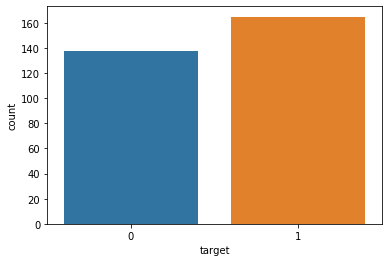

In [10]:
sns.countplot(x="target", data=df)
plt.show

In [12]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [13]:
#percentage of people who dont have any heart disease
len(df[df.target==0])/len(df.target)*100

45.54455445544555

In [14]:
#percentage of people who have heart disease
len(df[df.target==1])/len(df.target)*100

54.45544554455446

<function matplotlib.pyplot.show(*args, **kw)>

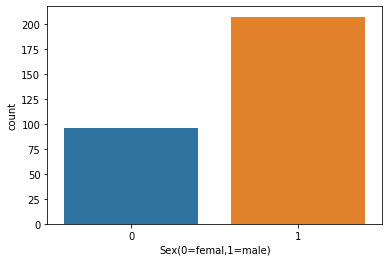

In [15]:
sns.countplot(x='sex',data=df)
plt.xlabel("Sex(0=femal,1=male)")
plt.show

In [16]:
#percentage of female 
len(df[df.sex==0])/len(df.target)*100

31.683168316831683

In [17]:
#percentage of male 
len(df[df.sex==1])/len(df.target)*100

68.31683168316832

In [19]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


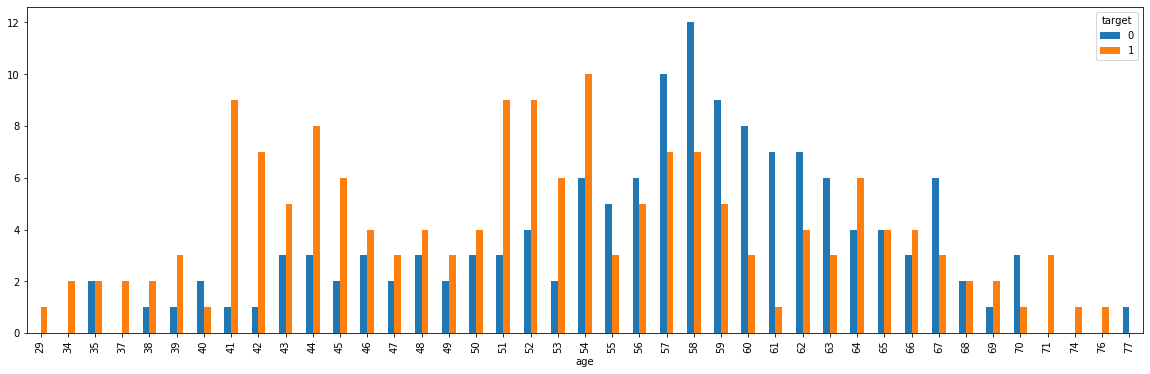

In [20]:
pd.crosstab(df.age,df.target).plot(kind='bar',figsize=(20,6))

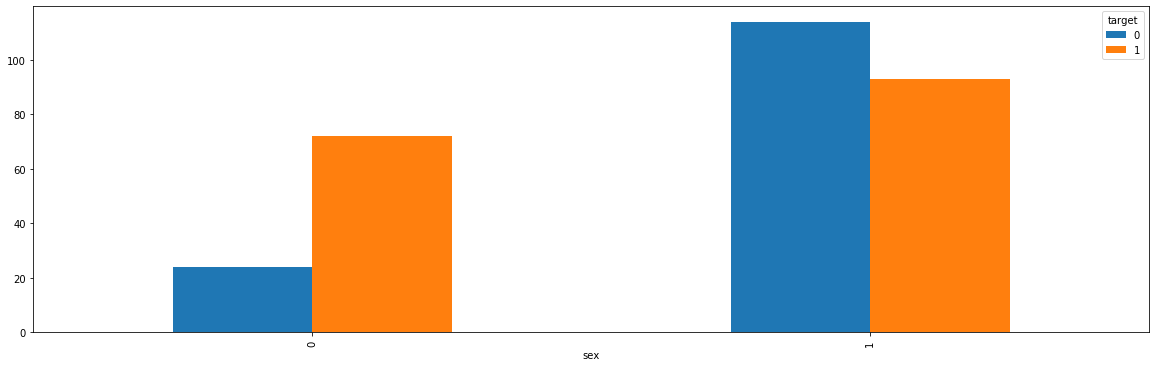

In [21]:
pd.crosstab(df.sex,df.target).plot(kind='bar',figsize=(20,6))

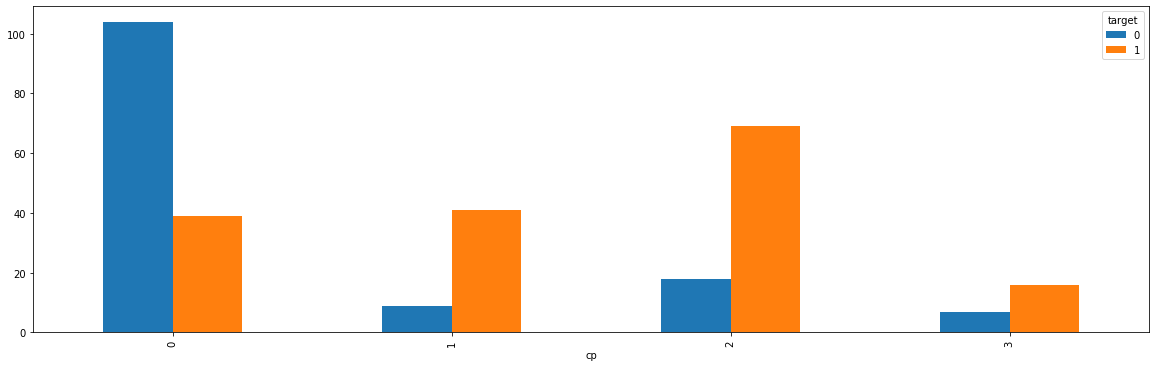

In [22]:
pd.crosstab(df.cp,df.target).plot(kind='bar',figsize=(20,6))

In [23]:
df.head() #features are the columns of the dataframe

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


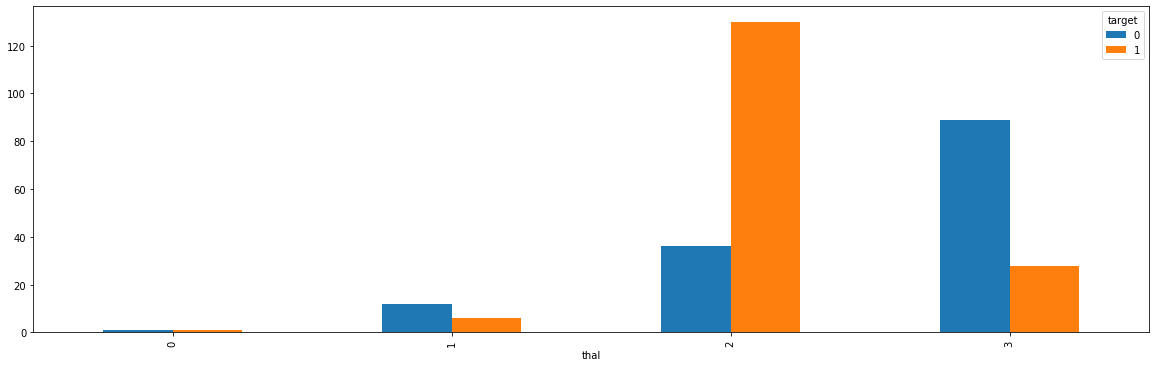

In [28]:
pd.crosstab(df.thal	,df.target).plot(kind='bar',figsize=(20,6))

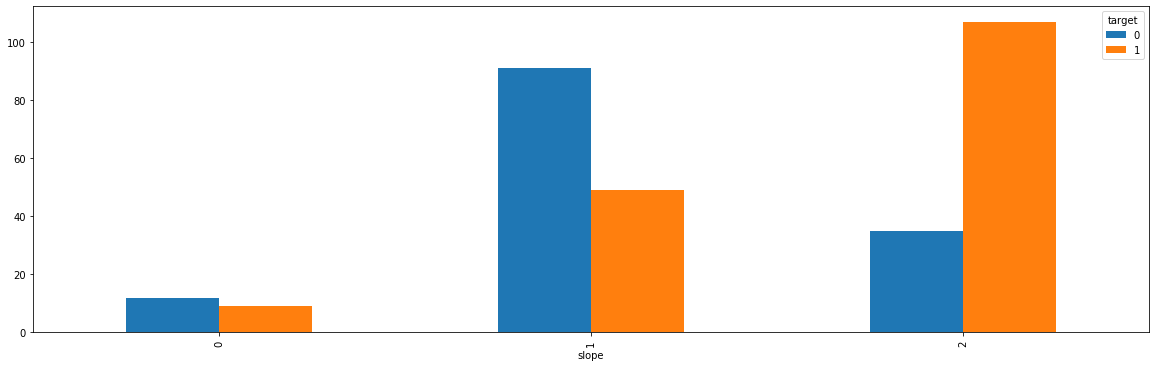

In [31]:
pd.crosstab(df.slope,df.target).plot(kind='bar',figsize=(20,6))

In [32]:
a=pd.get_dummies(df['cp'], prefix='cp')

In [33]:
b=pd.get_dummies(df['thal'], prefix='thal')
c=pd.get_dummies(df['slope'], prefix='slope')

In [34]:
a

,cp_0,cp_1,cp_2,cp_3
0,0,0,0,1
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0
...,...,...,...,...
298,1,0,0,0
299,0,0,0,1
300,1,0,0,0
301,1,0,0,0


In [35]:
frames=[df,a,b,c]
df=pd.concat(frames, axis=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [36]:
df=df.drop(columns=['cp','thal','slope'])

In [37]:
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [38]:
x_data=df.drop(['target'],axis=1)
y=df.target.values

In [39]:
#normalize
#new_x=x-x(minimum)/x(maximum)-x(minimum)

In [41]:
x_data.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [42]:
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [44]:
x_train

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
74,0.291667,0.0,0.264151,0.198630,0.0,0.5,0.717557,0.0,0.032258,0.00,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
153,0.770833,0.0,0.490566,0.347032,0.0,0.0,0.618321,0.0,0.000000,0.25,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
64,0.604167,1.0,0.433962,0.194064,1.0,0.0,0.717557,0.0,0.000000,0.00,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
296,0.708333,0.0,0.283019,0.162100,0.0,0.5,0.496183,1.0,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
287,0.583333,1.0,0.566038,0.242009,0.0,0.0,0.709924,0.0,0.000000,0.25,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,0.291667,1.0,0.358491,0.276256,1.0,0.0,0.549618,1.0,0.016129,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
192,0.520833,1.0,0.245283,0.141553,0.0,0.5,0.320611,0.0,0.225806,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
117,0.562500,1.0,0.245283,0.152968,0.0,0.0,0.694656,0.0,0.306452,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
47,0.375000,1.0,0.415094,0.299087,0.0,0.0,0.648855,0.0,0.000000,0.00,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [61]:
prediction=knn.predict(x_test)

In [62]:
knn.score(x_test,y_test)

0.8852459016393442